In [7]:
#!pip install dlib

In [8]:
import numpy as np
import cv2
import dlib
import os
from imutils import face_utils
from google.colab import drive
from google.colab.patches import cv2_imshow

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path = '/content/drive/MyDrive/test_opencv'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['model', 'face1.jpg', 'face2.jpg']

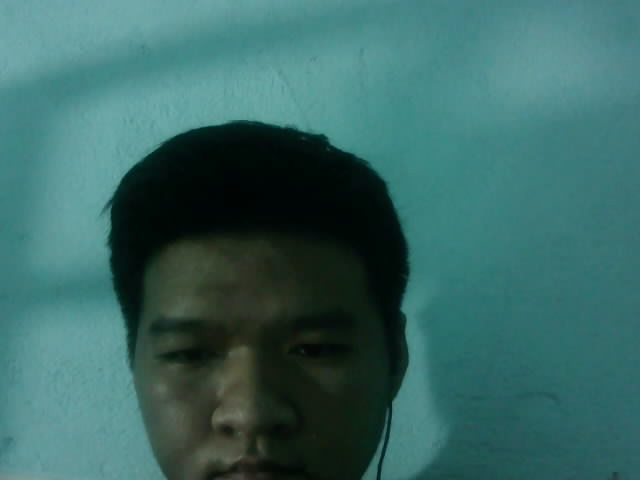

In [11]:
# Hiển thị một ảnh
img = cv2.imread(path + "/face1.jpg")
cv2_imshow(img)

In [12]:
face_landmarks_model_path = path+ "/model/shape_predictor_68_face_landmarks.dat"

In [13]:
face_recognition_model_path = path+ "/model/dlib_face_recognition_resnet_model_v1.dat"

In [14]:
img_path = path+  "/face1.jpg"

In [15]:
face_detector = dlib.get_frontal_face_detector()

In [16]:
img = cv2.imread(img_path)

In [17]:
faces = face_detector(img)

In [18]:
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

In [19]:
shape_predictor = dlib.shape_predictor(face_landmarks_model_path)

In [20]:
face_shape = shape_predictor(img, face)

In [36]:
face_shape_array = face_utils.shape_to_np(face_shape)

In [21]:
shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)

In [30]:
face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)

array([[[166, 163, 108],
        [165, 162, 107],
        [164, 161, 106],
        ...,
        [127, 125,  67],
        [127, 125,  67],
        [127, 125,  67]],

       [[166, 163, 108],
        [165, 162, 107],
        [164, 161, 106],
        ...,
        [127, 125,  67],
        [127, 125,  67],
        [127, 125,  67]],

       [[166, 163, 108],
        [166, 163, 108],
        [165, 162, 107],
        ...,
        [127, 125,  67],
        [127, 125,  67],
        [127, 125,  67]],

       ...,

       [[136, 138, 109],
        [136, 138, 108],
        [137, 139, 109],
        ...,
        [ 94,  94,  48],
        [ 94,  94,  48],
        [ 94,  94,  48]],

       [[138, 137, 111],
        [138, 137, 109],
        [139, 138, 110],
        ...,
        [ 93,  93,  47],
        [ 93,  93,  47],
        [ 93,  93,  47]],

       [[138, 137, 111],
        [138, 137, 111],
        [139, 138, 110],
        ...,
        [ 93,  93,  47],
        [ 93,  93,  47],
        [ 93,  93,  47]]], dtype=uint8)
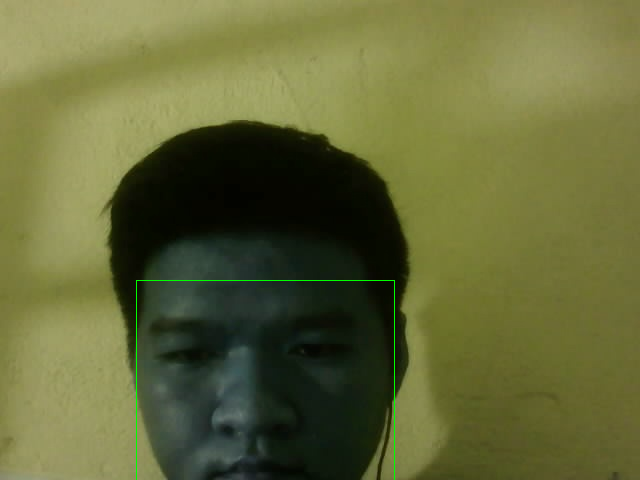

In [33]:
cv2.rectangle(img, point_a, point_b, (0,255,0))

In [37]:
for point in face_shape_array:
  cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

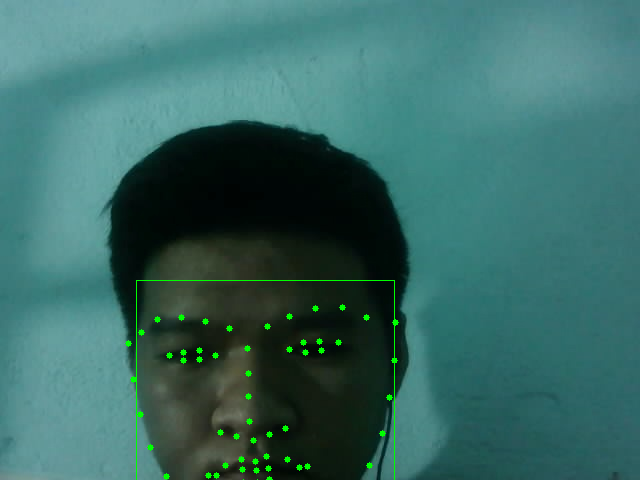

In [38]:
cv2_imshow(img)